### Data Exploration and Cleaning

Importing related libraries and read the file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('Job_Tweets.csv')
#df.head()

from google.colab import drive
import os

drive.mount('/content/drive')
notebook_path = r"/content/drive/MyDrive/SOCIAL_MEDIA"
os.chdir(notebook_path)
!pwd

df = pd.read_csv('Job_Tweets.csv')
df.head()

Mounted at /content/drive
/content/drive/MyDrive/SOCIAL_MEDIA


,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251


In [3]:
# list all column names in the dataset
list(df.columns)

['ID',
 'Timestamp',
 'User',
 'Text',
 'Hashtag',
 'Retweets',
 'Likes',
 'Replies',
 'Source',
 'Location',
 'Verified_Account',
 'Followers',
 'Following']

In [4]:
# to check dimensions of the dataset
print("Dimensions of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dimensions of the dataset:
Number of rows: 50000
Number of columns: 13


In [5]:
# to get a summary of data types and non-null values
print("Summary of data types and non-null values:")
df.info()

Summary of data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


In [6]:
# convert data type of user ID from int to object
df["ID"] = df["ID"].astype(object)
df.dtypes

,0
ID,object
Timestamp,object
User,object
Text,object
Hashtag,object
Retweets,int64
Likes,int64
Replies,int64
Source,object
Location,object


In [9]:
# convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Timestamp'])
df[['Date']].head()

,Date
0,2019-12-30
1,2019-12-30
2,2019-12-30
3,2019-12-30
4,2019-12-30


In [10]:
# removing unnecessary columns
df = df.drop(columns=['Timestamp', 'User',	'Hashtag',	'Retweets',	'Likes',	'Replies', 'Location', 'Followers',	'Following'])
df.head()

,ID,Text,Source,Verified_Account,Date
0,1211798864656769025,Looking for an exciting job where you can ski ...,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,2019-12-30
1,1211797371853705220,Hail in Phoenix - no way! New opportunity at ...,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",False,2019-12-30
2,1211795775363145728,Rackspace is hiring! We are looking for Nation...,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",False,2019-12-30
3,1211793355060981767,We are #hiring Administrative Assistant in Nan...,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",False,2019-12-30
4,1211792689022349315,We are #hiring Family Service Counselor in Irv...,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",False,2019-12-30


In [11]:
# describing categorical data
df.describe(include='object')

,ID,Text,Source
count,50000,50000,50000
unique,50000,46507,261
top,1211798864656769025,We generally enjoy and are satisfied by being ...,"<a href=""http://www.ziprecruiter.com"" rel=""nof..."
freq,1,134,21888


In [12]:
# to check for any missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                  0
Text                0
Source              0
Verified_Account    0
Date                0
dtype: int64


In [14]:
# to identify any duplicated rows in the dataset
duplicate_rows = df.duplicated()
duplicate_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
49995,False
49996,False
49997,False
49998,False


In [15]:
# to count the number of duplicated rows
num_duplicates = sum(duplicate_rows)
print(num_duplicates)

0


In [ ]:
# to display unique values in each column to identify categorical variables
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in ID:
[1211798864656769025 1211797371853705220 1211795775363145728 ...
 1636306593858871297 1636305111726141440 1636304982768066561]

Unique values in Timestamp:
[datetime.date(2019, 12, 30) datetime.date(2019, 12, 29)
 datetime.date(2019, 12, 28) datetime.date(2019, 12, 27)
 datetime.date(2019, 12, 26) datetime.date(2019, 12, 25)
 datetime.date(2019, 12, 24) datetime.date(2019, 12, 23)
 datetime.date(2019, 12, 22) datetime.date(2019, 12, 21)
 datetime.date(2019, 12, 20) datetime.date(2019, 12, 19)
 datetime.date(2019, 12, 18) datetime.date(2019, 12, 17)
 datetime.date(2019, 12, 16) datetime.date(2019, 12, 15)
 datetime.date(2019, 12, 14) datetime.date(2019, 12, 13)
 datetime.date(2019, 12, 12) datetime.date(2019, 12, 11)
 datetime.date(2019, 12, 10) datetime.date(2019, 12, 9)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 28) datetime.date(2020, 12, 27)
 datetime.date(2020, 12, 26) datetime.date(2020, 12, 25)
 datetime.date(2020, 12, 2

<br>

###Test Preprocessing

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [17]:
nltk.data.path.append("C:\\nltk_data")  # Manually set the NLTK data path
nltk.download('stopwords', download_dir="C:\\nltk_data")
nltk.download('punkt', download_dir="C:\\nltk_data")
nltk.download('wordnet', download_dir="C:\\nltk_data")

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
# 1. Noise Reduction
def remove_noise(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, punctuation
    return text

In [20]:
# 2. Normalization: Lowercasing & Lemmatization
lemmatizer = WordNetLemmatizer()
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return ' '.join(words)

In [21]:
# 3. Tokenization (Already integrated in Normalization)
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [22]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [23]:
# Apply Preprocessing to the Dataset
def preprocess_text(text):
    text = remove_noise(text)
    text = normalize_text(text)
    text = remove_stopwords(text)
    return text

# Apply all preprocessing steps to the 'text' column (adjust column name if needed)
df['cleaned_text'] = df['Text'].apply(preprocess_text)  # Replace with your column name
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,Looking for an exciting job where you can ski ...,looking exciting job ski free ski area still h...
1,Hail in Phoenix - no way! New opportunity at ...,hail phoenix way new opportunity freedom possi...
2,Rackspace is hiring! We are looking for Nation...,rackspace hiring looking national partner mana...
3,We are #hiring Administrative Assistant in Nan...,hiring administrative assistant nanuet ny http...
4,We are #hiring Family Service Counselor in Irv...,hiring family service counselor irvine ca http...


In [24]:
# 5. Feature Selection: Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
tfidf_features = vectorizer.fit_transform(df['cleaned_text'])
print("TF-IDF feature extraction complete. Shape:", tfidf_features.shape)

TF-IDF feature extraction complete. Shape: (50000, 500)


In [25]:
# 6. Dimensionality Reduction using TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Reduce to 100 dimensions
reduced_features = svd.fit_transform(tfidf_features)
print("Dimensionality Reduction complete. Shape:", reduced_features.shape)

Dimensionality Reduction complete. Shape: (50000, 100)


In [26]:
# Final preprocessed dataframe
df_features = pd.DataFrame(reduced_features, columns=[f'component_{i}' for i in range(1, 101)])
print("\nFinal reduced features:")
df_features.head()


Final reduced features:


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.103900,-0.107554,-0.104720,0.003527,0.016649,0.024761,-0.002640,-0.006022,0.010879,0.018996,...,-0.012958,-0.010911,0.032460,0.003623,-0.044186,0.003766,0.038933,0.024188,-0.010522,-0.010018
1,0.095168,-0.123122,-0.100341,-0.014658,0.004417,-0.024767,-0.045566,0.011098,0.315262,0.028529,...,0.007412,-0.038121,-0.036577,0.016213,0.006839,-0.010751,0.001310,0.000958,-0.016379,-0.006777
2,0.142683,-0.175146,-0.032684,0.144696,0.128906,0.024622,0.008648,0.000044,-0.031499,0.073440,...,0.005107,-0.018724,0.049559,0.066610,-0.108047,0.020274,0.131494,0.073334,-0.038473,0.001467
3,0.141298,-0.182258,0.141017,0.082337,0.015777,0.061359,-0.160538,0.047169,0.376535,-0.240623,...,-0.002521,-0.048409,0.033581,-0.012715,-0.035147,0.065767,0.004159,0.060227,0.022823,0.118054
4,0.077854,-0.103125,0.074734,-0.005294,-0.123509,0.076021,0.217922,-0.101147,0.022651,0.001102,...,0.010442,0.017991,0.032615,-0.030871,-0.001787,0.012350,-0.002957,0.002328,0.011313,0.023715


In [27]:
# Make a copy
cleaned_df = df.copy()
cleaned_df.head()

,ID,Text,Source,Verified_Account,Date,cleaned_text
0,1211798864656769025,Looking for an exciting job where you can ski ...,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,2019-12-30,looking exciting job ski free ski area still h...
1,1211797371853705220,Hail in Phoenix - no way! New opportunity at ...,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",False,2019-12-30,hail phoenix way new opportunity freedom possi...
2,1211795775363145728,Rackspace is hiring! We are looking for Nation...,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",False,2019-12-30,rackspace hiring looking national partner mana...
3,1211793355060981767,We are #hiring Administrative Assistant in Nan...,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",False,2019-12-30,hiring administrative assistant nanuet ny http...
4,1211792689022349315,We are #hiring Family Service Counselor in Irv...,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",False,2019-12-30,hiring family service counselor irvine ca http...


### Data Labeling

Install and import related libraries

In [ ]:
#pip install textblob

In [32]:
#pip install vaderSentiment

In [33]:
#pip install flair

In [ ]:
#pip install transformers

Installations are successful. Now, let's proceed to do sentiment analysis using TextBlob.

In [29]:
import torch
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from flair.models import TextClassifier
from flair.data import Sentence

In [30]:
#selecting column 'Text' to do sentiment analysis and display in DataFrame
df_text = pd.DataFrame(cleaned_df['cleaned_text'])
df_text.head()

,cleaned_text
0,looking exciting job ski free ski area still h...
1,hail phoenix way new opportunity freedom possi...
2,rackspace hiring looking national partner mana...
3,hiring administrative assistant nanuet ny http...
4,hiring family service counselor irvine ca http...


<br>

In [31]:
# Applying TextBlob
cleaned_df['text_blob'] = cleaned_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment)
cleaned_df[['text_blob', 'cleaned_text']].head()

,text_blob,cleaned_text
0,"(0.35, 0.8)",looking exciting job ski free ski area still h...
1,"(0.06818181818181818, 0.7272727272727273)",hail phoenix way new opportunity freedom possi...
2,"(0.0, 0.0)",rackspace hiring looking national partner mana...
3,"(0.0, 0.0)",hiring administrative assistant nanuet ny http...
4,"(0.0, 0.0)",hiring family service counselor irvine ca http...


<br> Let's do sentiment analysis using Vader.

In [ ]:
# Applying Vader
analyzer = SentimentIntensityAnalyzer()
cleaned_df['text_vader'] = cleaned_df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x))
cleaned_df[['text_vader', 'cleaned_text']].head()

,text_vader,cleaned_text
0,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",looking exciting job ski free ski area still h...
1,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",hail phoenix way new opportunity freedom possi...
2,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",rackspace hiring looking national partner mana...
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",hiring administrative assistant nanuet ny http...
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",hiring family service counselor irvine ca http...


Let's do sentiment analysis using flair.

In [ ]:
# Applying flair
classifier = TextClassifier.load('en-sentiment')
sentences = [Sentence(text) for text in cleaned_df['cleaned_text']]
classifier.predict(sentences)
cleaned_df['text_flair'] = [sentence.labels[0].value for sentence in sentences]
cleaned_df[['text_flair', 'cleaned_text']].head()

2024-12-29 03:07:49,528 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpdqp619bv


100%|██████████| 253M/253M [00:13<00:00, 20.2MB/s]

2024-12-29 03:08:03,022 copying /tmp/tmpdqp619bv to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-12-29 03:08:03,932 removing temp file /tmp/tmpdqp619bv


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

,text_flair,cleaned_text
0,POSITIVE,looking exciting job ski free ski area still h...
1,NEGATIVE,hail phoenix way new opportunity freedom possi...
2,POSITIVE,rackspace hiring looking national partner mana...
3,POSITIVE,hiring administrative assistant nanuet ny http...
4,POSITIVE,hiring family service counselor irvine ca http...


Let's do sentiment analysis using Transformers. Let's try BERT.

In [ ]:
# Applying Transformers
sentiment_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
def analyze_sentiment(text):
    result = sentiment_model(text)
    return result[0]['label']

cleaned_df['text_bert'] = cleaned_df['cleaned_text'].apply(analyze_sentiment)
cleaned_df[['text_bert', 'cleaned_text']].head()

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,text_bert,cleaned_text
0,5 stars,looking exciting job ski free ski area still h...
1,3 stars,hail phoenix way new opportunity freedom possi...
2,5 stars,rackspace hiring looking national partner mana...
3,3 stars,hiring administrative assistant nanuet ny http...
4,5 stars,hiring family service counselor irvine ca http...


Let's do sentiment analysis with DistilBERT

In [ ]:
# Applying DistilBERT
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased", device=-1)
cleaned_df['text_distilbert'] = classifier(cleaned_df['cleaned_text'].tolist(), truncation=True, max_length=512)
cleaned_df['text_distilbert'] = cleaned_df['text_distilbert'].apply(lambda x: x['label'])
cleaned_df[['text_distilbert', 'cleaned_text']].head()

,text_distilbert,cleaned_text
0,LABEL_0,looking exciting job ski free ski area still h...
1,LABEL_0,hail phoenix way new opportunity freedom possi...
2,LABEL_0,rackspace hiring looking national partner mana...
3,LABEL_0,hiring administrative assistant nanuet ny http...
4,LABEL_1,hiring family service counselor irvine ca http...


<br>

###Data Visualization

Let's apply visualization for TextBlob.

In [35]:
# Applying visualization for TextBlob
cleaned_df['text_blob_polarity'] = cleaned_df['text_blob'].apply(lambda x: 'Positive' if x.polarity > 0 else ('Negative' if x.polarity < 0 else 'Neutral'))
cleaned_df[['text_blob_polarity', 'cleaned_text']].head()

,text_blob_polarity,cleaned_text
0,Positive,looking exciting job ski free ski area still h...
1,Positive,hail phoenix way new opportunity freedom possi...
2,Neutral,rackspace hiring looking national partner mana...
3,Neutral,hiring administrative assistant nanuet ny http...
4,Neutral,hiring family service counselor irvine ca http...


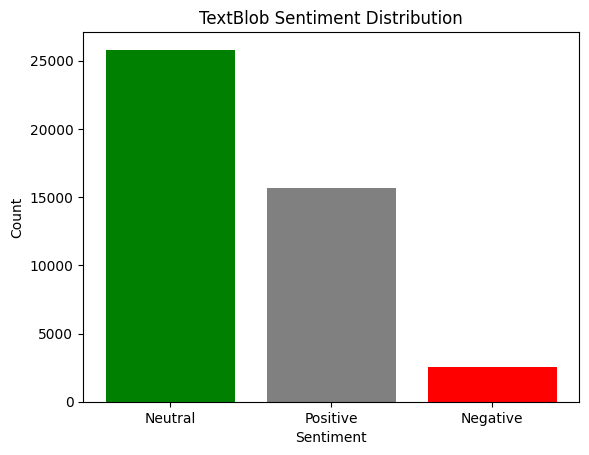

In [ ]:
sentiment_counts = cleaned_df['text_blob_polarity'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

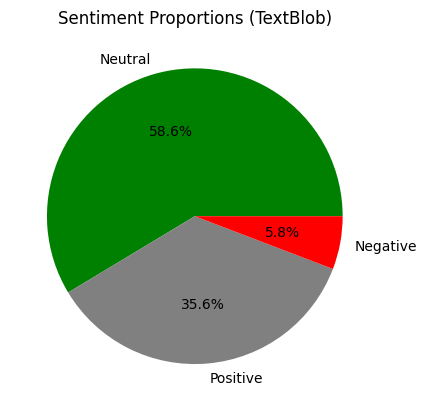

In [ ]:
sentiment_counts = cleaned_df['text_blob_polarity'].value_counts()

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Proportions (TextBlob)')
plt.show()

<br>

Let's apply visualization for Vader.

In [ ]:
# Applying visualization for Vader
# Split the VADER sentiment dictionary into individual columns
df_vader = pd.json_normalize(cleaned_df['text_vader'])
cleaned_df = pd.concat([cleaned_df, df_vader], axis=1)

In [ ]:
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

cleaned_df['overall_sentiment'] = cleaned_df['compound'].apply(classify_sentiment)
cleaned_df[['cleaned_text', 'neu', 'pos', 'neg', 'compound', 'overall_sentiment']].head()

,cleaned_text,neu,pos,neg,compound,overall_sentiment
0,looking exciting job ski free ski area still h...,0.649,0.351,0.0,0.7579,Positive
1,hail phoenix way new opportunity freedom possi...,0.526,0.474,0.0,0.8689,Positive
2,rackspace hiring looking national partner mana...,0.824,0.176,0.0,0.4939,Positive
3,hiring administrative assistant nanuet ny http...,1.000,0.000,0.0,0.0000,Neutral
4,hiring family service counselor irvine ca http...,1.000,0.000,0.0,0.0000,Neutral


<ipython-input-50-6d13b2b52da2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_sentiment', data=cleaned_df, palette='viridis')


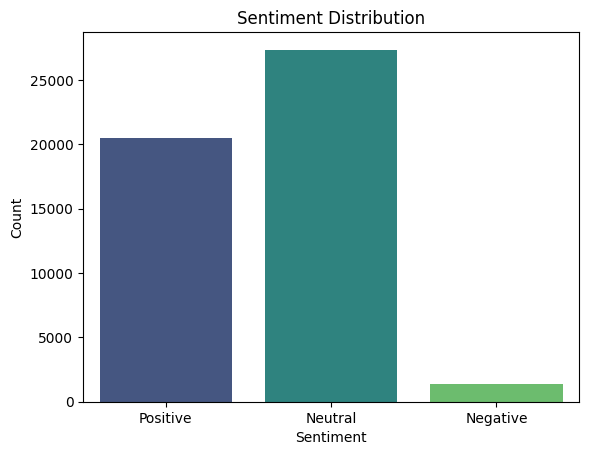

In [ ]:
sns.countplot(x='overall_sentiment', data=cleaned_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

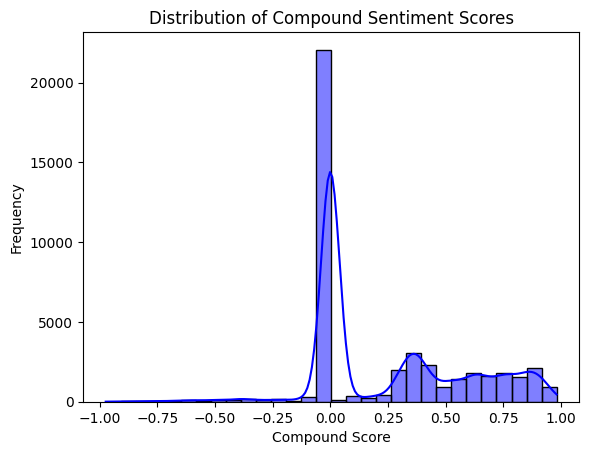

In [ ]:
sns.histplot(cleaned_df['compound'], bins=30, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

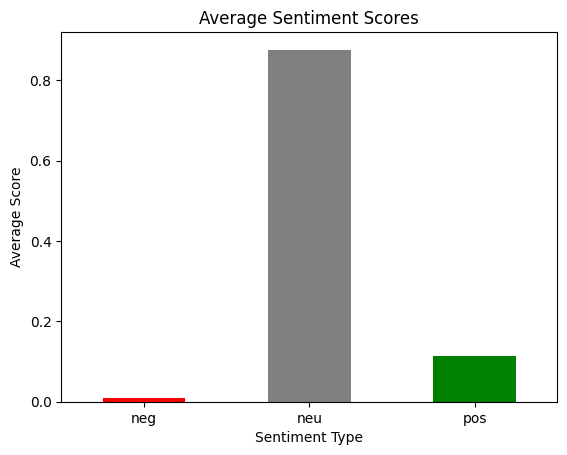

In [ ]:
avg_sentiment = cleaned_df[['neg', 'neu', 'pos']].mean()

avg_sentiment.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

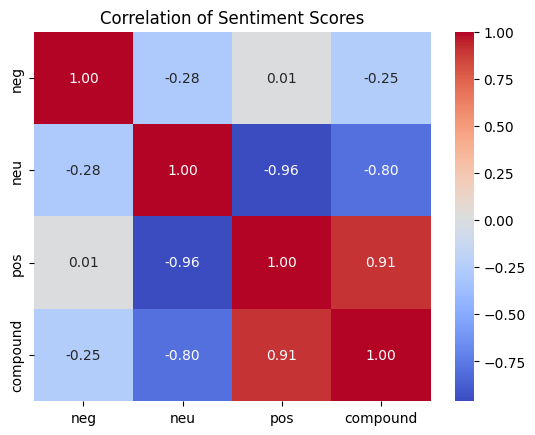

In [ ]:
correlation_matrix = cleaned_df[['neg', 'neu', 'pos', 'compound']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Sentiment Scores')
plt.show()

<br>

Let's apply visualization for Flair.

<ipython-input-54-7a867a0d0148>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


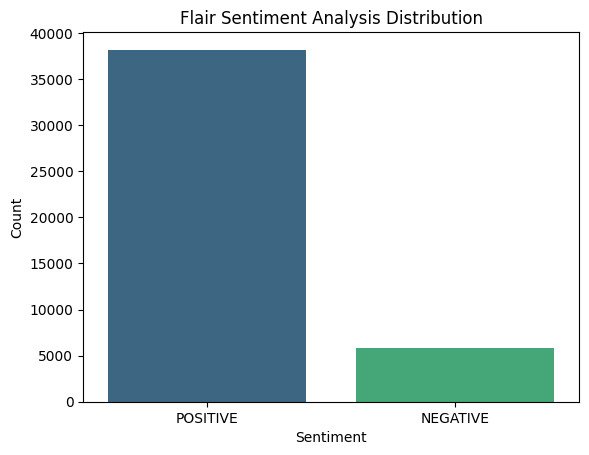

In [ ]:
# Applying visuallization for Flair
sentiment_counts = cleaned_df['text_flair'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Flair Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

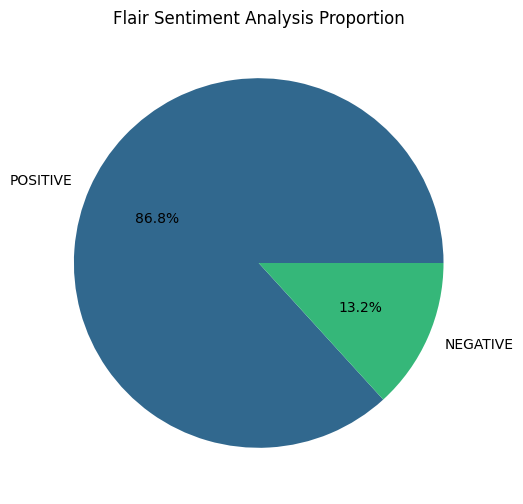

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_counts)))
plt.title('Flair Sentiment Analysis Proportion')
plt.show()

<br>

Let's compare TextBlob, Vader, and Flair.

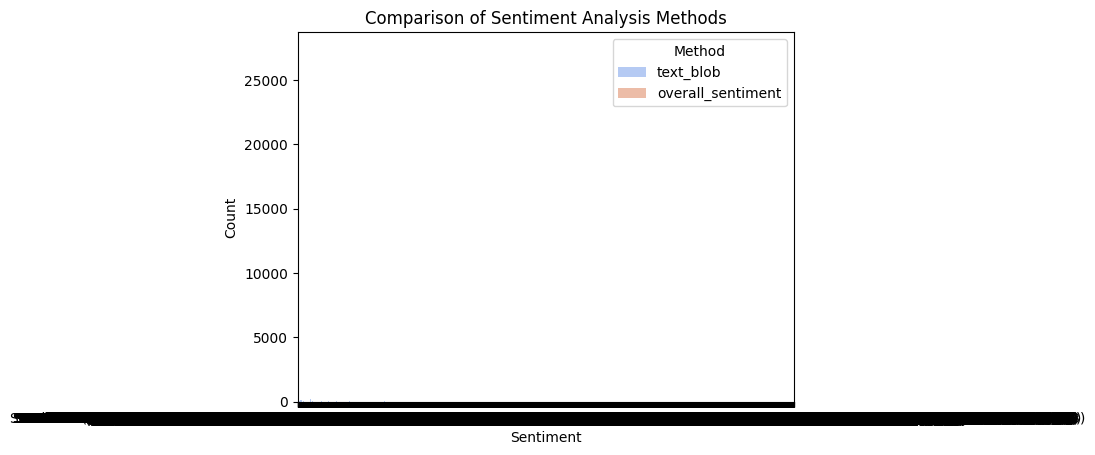

In [ ]:
# Compare TextBlob, Vader, and Flair
comparison_df = cleaned_df[['text_blob', 'overall_sentiment', 'text_flair']].melt(var_name='Method', value_name='Sentiment')

# Grouped bar chart
sns.countplot(data=comparison_df, x='Sentiment', hue='Method', palette='coolwarm')
plt.title('Comparison of Sentiment Analysis Methods')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Method')
plt.show()

<br>

Let's apply visualization for transformers. Let's try with BERT.

<ipython-input-67-9bda7032a094>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bert_counts.index, y=bert_counts.values, palette='viridis')


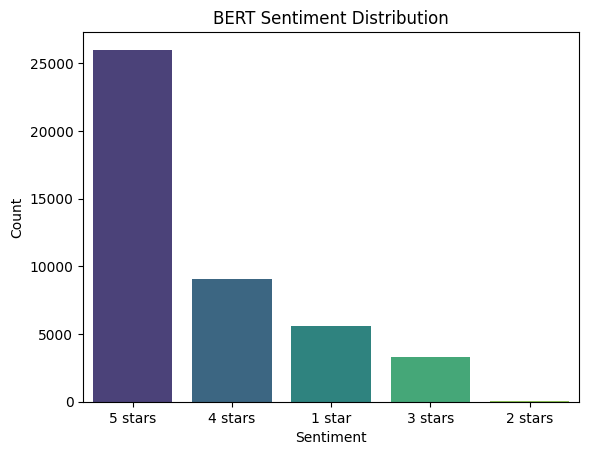

In [ ]:
bert_counts = cleaned_df['text_bert'].value_counts()
sns.barplot(x=bert_counts.index, y=bert_counts.values, palette='viridis')
plt.title('BERT Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

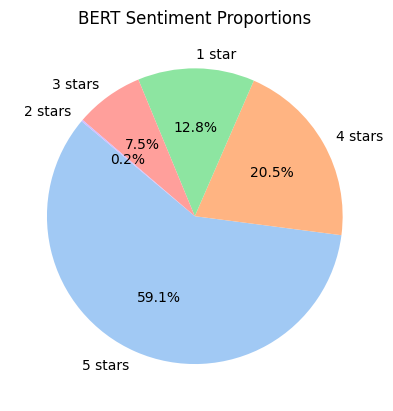

In [ ]:
bert_counts = cleaned_df['text_bert'].value_counts()
plt.pie(bert_counts.values, labels=bert_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('BERT Sentiment Proportions')
plt.show()

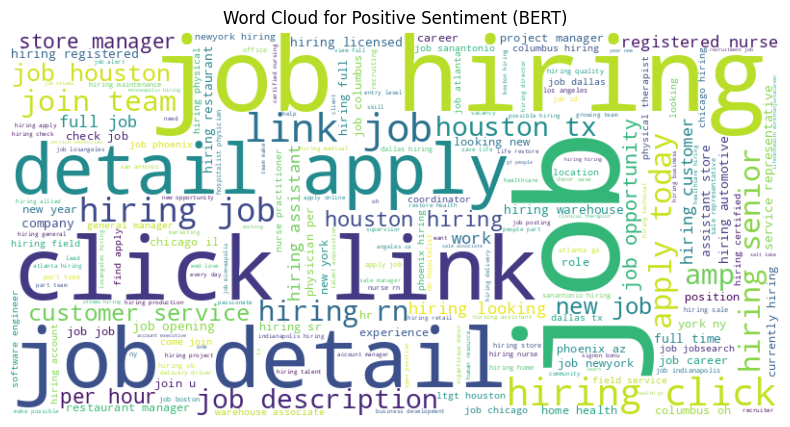

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for positive sentiment
positive_texts = " ".join(cleaned_df[cleaned_df['text_bert'] == '5 stars']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (BERT)')
plt.show()

<br>

Let's apply visualization for DISTILBERT.

<ipython-input-74-8323e283a9e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distilbert_counts.index, y=distilbert_counts.values, palette='coolwarm')


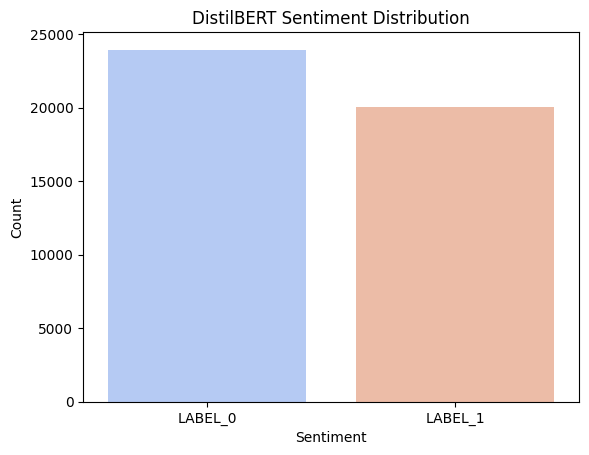

In [ ]:
distilbert_counts = cleaned_df['text_distilbert'].value_counts()
sns.barplot(x=distilbert_counts.index, y=distilbert_counts.values, palette='coolwarm')
plt.title('DistilBERT Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

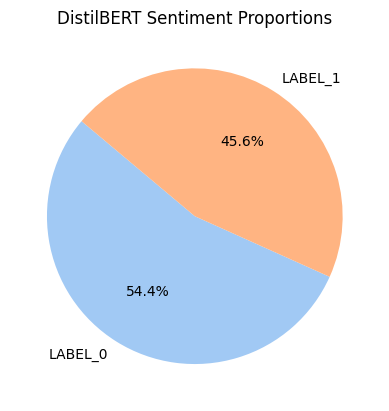

In [ ]:
distilbert_counts = cleaned_df['text_distilbert'].value_counts()
plt.pie(distilbert_counts.values, labels=distilbert_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('DistilBERT Sentiment Proportions')
plt.show()

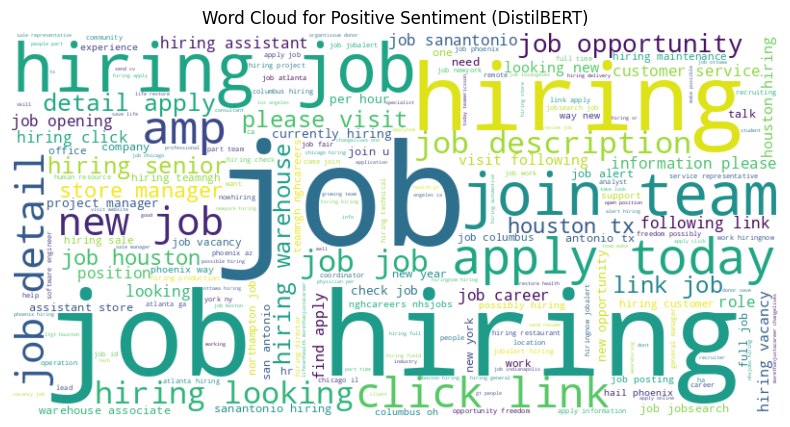

In [ ]:
# Generate a word cloud for positive sentiment
positive_texts_db = " ".join(cleaned_df[cleaned_df['text_distilbert'] == 'LABEL_0']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts_db)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (DistilBERT)')
plt.show()

<br>

Let's compare BERT and DistilBERT.

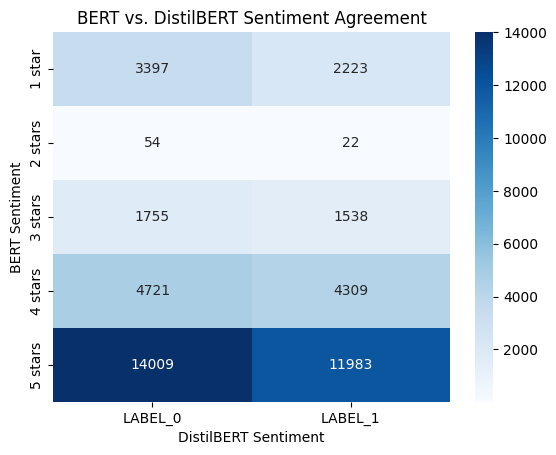

In [ ]:
# Create a confusion matrix-like comparison
comparison = pd.crosstab(cleaned_df['text_bert'], cleaned_df['text_distilbert'])

# Plot heatmap
sns.heatmap(comparison, annot=True, fmt="d", cmap='Blues')
plt.title('BERT vs. DistilBERT Sentiment Agreement')
plt.xlabel('DistilBERT Sentiment')
plt.ylabel('BERT Sentiment')
plt.show()